<a href="https://colab.research.google.com/github/nmcross/siim2025_llm_report_juicing_lab/blob/main/reportjuicing_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIIM Report Juicing Learning Lab
- Nathan M Cross MD MS CIIP
- Yee Ng MD
- Mohammed Kanani MS
#### Acknowledgements
- Brian Chang MD PhD - Colab coding draft
- Arezu Monawer MD - inspiration and data help

Thank you for joining us.  The goal of this lab is to help you understand the role large language models (LLMs) can play as natural language processing (NLP) tools for clinical radiology reports.  We will walk through this brief tutorial to show you how you can quickly get up and running using a collection of open source libraries to do this work.

## Google Colabs vs local
We have adapted this code to work in Google Colabs to make it easy for you to run it without any specialized hardware.  The free version of colabs puts severe restrictions on the size of the model we can use which is going to negatively impact model performance (i.e. we can only install a small model with a small GPU memory footprint, this will not be as performant as a large model). If you would like to use it outside of Google Colabs you will likely need to setup a virtual environment with conda, Python venv, Poetry etc to install all the libraries you need.  You will also need 10-50+Gb of hard drive space to store at least one of the more commonly used language models. You will see size estimates of the models on Ollama's site.

## Local hardware
If you'd like to run this locally you will need to have a few things:
1. **Storage Space** - local LLMs come in all shapes and sizes and you will need to weigh the cost vs benefit of using larger models vs smaller models.  Smaller models, like 2-10billion parameter models generally take up around 2-10Gb. Larger models like Llama4:scout is 67Gb. There are a variety of ways that clever computer scientists have managed to make models smaller without sacrificing too much performance.  That is largely why you will see multiple versions in Ollama with things like _fp16, _K_M behind their names. If you want to experiment with several models you'll want to have storage space for all of them.
2. **GPU**
    - **MacOS** - If you have an Apple Silicon mac you Will likely be able to experiment with local language models on that computer since these machines share system, memory, and GPU memory and as a result, the GPU can access a very large chunk of memory. This is dependent on the amount of memory installed on your machine, but may allow you to load 20 billion or 70 billion parameter models and get modest token generation performance. This can be very handy for prototyping.
    - **Linux/Windows** - if you were using a Windows or Linux machine equipped with a graphics card (GPU) you will be dependent on the amount of memory on that graphics card. To get high performance from language models on GPU equipped machines, the entire model should fit within the GPU memory. So for instance, a high-end consumer cards, such as the Nvidia GeForce RTX 5090 has 32 GB of memory. So if you are using a model on a computer with one of these graphics cards, the highest performing models will be smaller than 32 GB so that they can be entirely loaded within memory.
3. **OS** - most of this code is tested on Linux distributions but you can likely get it running with minimal effort on Windows WSL (windows subsystem for linux) or MacOS (with the help of Homebrew)

## Real World Use and Prompt Engineering
### Prompt Engineering
The value of prompt engineering, and testing cannot be understated. Just as a poorly crafted prompt to a collection of annotator's would generate a low cap, you can similarly get poor results with the most complex, state-of-the-art language models. To give a sense of the types of situations that you will have to think through, if you're trying to extract the binary presence or absence of intracranial hemorrhage in a report, you will have to think about whether you want subarachnoid, subdural, or intracranial, hemorrhages classified as true or false. How will you handle mixed density subdural hemorrhages? Will the language model understand that a contusion or diffuse axonal injury are hemorrhagic pathologies.  How do you want the model to handle hypodense extract seal collections or postsurgical collections with trace amounts of hyper density which might be due to surgical products? How do you want the report to be classified if the radiologist says possible or questionable hemorrhage?
You can see the prompt below that I've generated for compression fractures, here is an additional reference to help you understand some of the nuances of prompt engineering. The Internet has many resources to help you understand more.
- [Dataquest Prompt Engineering](https://www.dataquest.io/blog/introduction-to-prompt-engineering-for-data-professionals/)

### Report Preprocessing
Depending on where you get your radiology reports as well as local reporting practices, you will likely need to do some pre-processing on your report data to make it useful. For instance, if you can decrease the total amount of text within the report, you will save time with each inference, you likely will not want to have the indication as part of the report since the model could afccidentally mistake the indication as something that is actually present in the images breaking apart, your report in the sections and using the specific component that you need will take some time in testing.

## Primary Libraries Utilized
- Ollama - tool for easily downloading models and running them locally, absolutely amazing and can get you up and running in a line or two of code. See their documentation
  - [primary site](https://ollama.com/)
  - [model list](https://ollama.com/search)
  - [docs](https://github.com/ollama/ollama/tree/main/docs)
- LangChain - tool for abstracting model or API being used and a lot of additional functionality for easily handling complex tasks and 'chaining' model queries together.
  - [primary site](https://www.langchain.com/)
  - [docs](https://python.langchain.com/docs/introduction/)




## TODO
- lang graph
- check reports1 item 4 and make sure it should be True
- rearrange analysis section
- break out the challenge code
- make a slide to explain the challenge
    - what they can modify and what they can't

## First Set the GPU
* Go to "Runtime" on the navigation bar
* Change runtime type
* Select the option "T4 GPU"

## Installing Ollama

Before we begin, we need to install [Ollama](https://ollama.com/) to access a wide range of open-source Large Language Models (LLMs).
To do this, we will install Colab-Xterm. Colab-Xterm is an extension for Google Colab notebooks that allows users to open a terminal within a Colab environment, to facilitate installing Ollama and pulling LLM models.

In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

## Launching Colab-Xterm

The cell below will open a terminal for your use.
Then, copy and paste the commented commands into the shell to run them, starting with ```sudo apt-get install pciutils lshw```

You can use the terminal to pull various LLM models such as mistral or llama3.1:8b by using the command ```ollama pull llama3.1:8b```. The list of LLMs that you can pull are listed on [Ollama's model repository](https://ollama.com/search)

**tip**: Copying and pasting commands in colab takes getting used to. On Windows, I found Ctrl+C useful for copying the commands in the cell and then within the terminal, to right-click and click "paste as plain text" the easiest way to run each command. On a Mac, command-c and command-v work well.

In [ ]:
%xterm
# sudo apt-get install pciutils lshw; curl https://ollama.ai/install.sh | sh; ollama serve &
# ollama pull phi4-reasoning
# ollama pull llama3.1:8b
# ollama pull gemma3:12b

In [ ]:
!pip install langchain-ollama

## Prompting Text
**Clinical Task** - Mine the reports for mentions definite or possible compression fractures of the cervical, thoracic or lumbar spine of any acuity.


In [1]:
prompt_system = '''
You are a world class radiologist classifying clinical radiology reports. Don't hallucinate.
'''


prompt_isFx = '''
Return \"True\" if acute or chronic spinal compression fracture is mentioned and \"False\" if no acute or chronic spinal compression fracture is mentioned. A valid output would be {"isFx": "True"} or {"isFx": "False"} but not {"isFx": True}
'''

prompt_background0 = '''
Spinal compression fractures are collapse of the vertebra with associated loss in height anteriorly, centrally or posteriorly.'''

prompt_background1 = '''
Some relevant background:

#### Overview of Anatomy, Pathology, and Etiology
**Anatomy**: The spine consists of the cervical, thoracic, and lumbar regions. Each vertebra is composed of a vertebral body, pedicles, laminae, and processes. The cervical spine includes C1 (atlas) and C2 (axis), which are unique in structure and function.

**Pathology**: Compression fractures occur when the vertebral body collapses, often due to osteoporosis, trauma, or pathological conditions like tumors or infections. These fractures can be classified as acute, subacute, or chronic based on their age and radiographic features.

**Etiology**: Common causes include falls, motor vehicle accidents, and degenerative diseases. Osteoporosis is a significant risk factor, particularly in the elderly.

#### Task Description
Classify clinical radiology reports of CT studies into two classes:
1. **True**: Reports containing descriptions of acute or chronic compression fractures of the cervical, thoracic, or lumbar spine.
2. **False**: Reports with no mention of fractures or descriptions indicating no fractures.

#### Classification Guidelines for Ambiguous Situations
- **Trace/Subtle Compression Fracture, Anterior Wedging, Compression Deformity**: Classify as **True**.
- **Age Indeterminate, Questionable, Uncertain Acuity, Chronic, Old, Remote, Suggestive**: Classify as **True**.
- **Non-Compression Fractures (e.g., Chance fractures, hyperextension injuries, dislocations, transverse process fractures)**: Classify as **False**.
- **Fractures of C1 or C2 (atlas and axis)**: Classify as **False**.

#### Relevant Anatomy and Terminology
- **Compression Deformity**: Indicates a vertebral body collapse, often seen in compression fractures.
- **Burst Fracture**: A severe type of compression fracture involving the vertebral body and posterior elements, often with retropulsion of bone fragments into the spinal canal.
- **Progress Towards Healing**: Refers to radiographic signs indicating fracture healing, such as callus formation.
- **Age Indeterminate**: Fracture age cannot be precisely determined; classify as **True**.
- **Uncertain Acuity**: Ambiguity in determining if the fracture is acute or chronic; classify as **True**.
- **Suggestive of Fracture**: Indications of a possible fracture; classify as **True**.
- **ORIF (Open Reduction and Internal Fixation)**: Surgical procedure to fix severe fractures using hardware like plates and screws.
- **PSIF (Posterior Spinal Instrumented Fusion)**: A surgical procedure to stabilize the spine using rods and screws.
- **ALIF (Anterior Lumbar Interbody Fusion)**: A surgical procedure to fuse lumbar vertebrae from the front
- **ACDF (Anterior Cervical Discectomy and Fusion)**: A surgical procedure to remove a cervical disc and fuse the adjacent vertebrae.
- **Fusion**: The process of joining two or more vertebrae to prevent movement.
- **Instrumented**: Use of surgical hardware to stabilize the spine.
- **Similar Appearance/Alignment, Unchanged Alignment, Interval Change, Redemonstrated**: Terms indicating comparison with previous imaging studies to assess changes or stability.
'''

prompt_background2 = '''
Some relevant background:

The task is to classify clinical radiology reports of CT studies into two classes: (1) true if the report contains a description of acute or chronic compression fractures of the cervical, thoracic, or lumbar spine, and (2) false if there is no mention of fracture or a description of no fractures.
#### Overview of Anatomy, Pathology, and Etiology:
Vertebral compression fractures (VCFs) are common, particularly in the elderly and those with osteoporosis. They occur when the vertebral body collapses, leading to a reduction in height. These fractures can be acute or chronic and are often caused by trauma or pathological conditions like osteoporosis.
#### Task Description:
Classify CT radiology reports based on the presence of acute or chronic compression fractures in the cervical, thoracic, or lumbar spine.
#### Classification Instructions:
1. True:
• Reports mentioning 'compression fracture,' 'anterior wedging,' 'compression deformity,' 'height loss,' or similar terms.
• Descriptions indicating 'trace/subtle/mild,' 'age indeterminate,' 'questionable,' 'uncertain acuity,' 'chronic,' 'old,' 'remote,' or 'suggestive' of a compression fracture.
2. False:
• Reports with no mention of fractures or explicitly stating no fractures.
• Reports mentioning other types of fractures (e.g., 'Chance fractures,' 'hyperextension,' 'dislocation,' 'transverse process fracture').
• Fractures of C1 or C2 vertebrae should not be considered compression fractures.
#### Relevant Anatomy and Terminology:
• Compression Deformity: Indicates a vertebral body collapse.
• Burst Fracture: Severe type of compression fracture with vertebral body fragments.
• Progress Towards Healing: Indicates healing of a previously identified fracture.
• Age Indeterminate: Uncertain if the fracture is acute or chronic.
• Uncertain Acuity: Similar to age indeterminate.
• Suggestive of Fracture: Indicates a possible fracture.
• ORIF, PSIF, ALIF, ACDF: Surgical procedures for spinal stabilization, not directly indicating compression fractures.
• Fusion, Instrumented: Terms related to surgical stabilization.
• Similar Appearance/Alignment, Unchanged Alignment: Indicate no new fractures.
• Interval Change, Redemonstrated: Indicate changes or persistence of previously identified fractures.
'''

## Sample Data
There are two sample datasets 1 and 2 with the associate ground truth.  These are cross-section imaging reports that have the PHI removed or modified.  The data that comes before the Findings and Impression sections have been removed as well as some communication and attestation materials to keep token counts down and to simulate pre-processing similar to what you would do in the real world.

reports1 (n=15) is very challenging.  I've stacked the deck with descriptions use varying terminologies and similar types of fractures that aren't compression fractures.  Plus there are things like broken hardware comments about risk for fracture and other things for the LLM to stumble over.  All of these scenarios arose during annotation of real world cases that we are simulating here.

reports2 (n=11) is more of a natural prevalence dataset so as not to discourage you that these techniques are problematic :)

In [2]:
reports1_gt = [
    False, # 1 not a compression fracture, ballistic injury
    False, # 2 not a compression fracture, extension injury
    False, # 3 nothing
    True, # 4
    True, # 5
    True, # 6
    True, # 7
    True, # 8
    True, # 9
    False, # 10
    True, # 11
    True, # 12
    False, # 13
    True, # 14
    False, # 15
    ]

reports1 = [
# 1
'''
FINDINGS:

NECK
Contrast-enhanced images of the neck show no obvious injury to bilateral carotid and bilateral vertebral arteries.
If there is concern for a vascular injury in the neck, reconstruction of this scan range as a formal CTA Neck with a dedicated interpretation should be requested.

CHEST
Heart, aorta, and great vessels: There are pulmonary emboli involving the right main pulmonary artery bifurcation with extension into the upper and lower lobar and distal branches. A few small segmental and subsegmental left lower lobe pulmonary emboli are also seen (series 500, images 213 and 224). RV LV ratio remains less than 1, although there is slight dilation of the main pulmonary artery at 32 mm, and enlargement of the right atrium.
Mediastinal hematoma: Absent
Pericardial fluid: Absent

Endotracheal tube: Present, approximately 2.8 cm from the carina.
Intercostal tubes: Absent.

Right lung: Basilar atelectasis.
Left lung:  Basilar atelectasis.

Right pneumothorax: Absent.
Left pneumothorax: Absent.
Right pleural fluid: Absent.
Left pleural fluid: Absent

ABDOMEN AND PELVIS
Liver: A small laceration is identified within hepatic segment 5, which measures approximately 2.3 cm in depth and measures approximately 2 cm in length. A 1.5 cm hepatic hypodensity is identified with a tiny peripheral punctate focus of arterial hyperenhancement, which demonstrates progressive fill-in on venous images is compatible with a simple hepatic hemangioma (example series 9, image 79 and series 8, image 76). Mild periportal edema is present, likely secondary to volume resuscitation.
Portal veins: Normal.
Gallbladder and bile ducts: Normal
Spleen: Normal
Pancreas: Normal

Right Kidney: Surgically absent with postoperative changes in the right renal fossa.
Left Kidney: No discrete traumatic injury. Broad products seen within the left retroperitoneal space are favored secondary to redistribution.
Adrenal glands: Normal
Aorta and IVC: Normal

Stomach, duodenum and small bowel: Enteric tube tip and side-port terminate within the gastric antrum. The stomach and small bowel are unremarkable in course and morphology.
Colon: The colon is unremarkable in course and morphology. Normal appendix.

Free intraperitoneal air or fluid: Expected pneumoperitoneum.
Mesentery, omentum, and retroperitoneum: Right nephrectomy changes. Blood products are seen within the bilateral retroperitoneal spaces, likely secondary to redistribution given delayed images. Right abdominal drain noted.
Lymph Nodes: No enlarged lymph nodes by CT size criteria.

Bladder: Bladder catheter in place with nondependent air.
Pelvis organs: Normal.

BODY WALL & SOFT TISSUES: Projectile tract entry is seen along the right posterolateral flank, progressing inferomedially through the right psoas muscle, bilateral L1-L2 neural foramen, left psoas muscle, and terminating within the subcutaneous soft tissues of the left flank. Of important note, the projectile tract crosses the spinal canal, with punctate projectile fragment seen within the canal. Midline laparotomy and right nephrectomy changes.

BONES:
Small chip fractures involving the right posterolateral corner of the L1 vertebral body and left L1 pars interarticularis secondary to projectile injury as above. No additional fracture seen.

Sternum: Normal

See accompanying CT of the Spine for a description of full spine evaluation.

IMPRESSION:
1. Projectile injury to the right posterolateral flank with resultant AAST grade 2 liver laceration, and reported high-grade right renal injury status post nephrectomy, as well as presumed spinal cord injury, with termination projectile within the left flank soft tissues.

2. Bilateral pulmonary embolism as described above, right more than left. There are findings suggestive of early right heart strain with dilation of the main pulmonary artery and right atrial enlargement, although RV LV ratio remains less than 1.

Preliminary findings were briefly reviewed with Dr. Gandalf the Grey  at the CT scanner by Dr. Boromir Son of Denethor II at 0d ago  0300 AM.

I have personally reviewed the images and agree with the report (or as edited).
''',

# 2
'''
FINDINGS:

NECK
Contrast-enhanced images of the neck show no obvious injury to bilateral carotid and bilateral vertebral arteries.
If there is concern for a vascular injury in the neck, reconstruction of this scan range as a formal CTA Neck with a dedicated interpretation should be requested.

CHEST
Aorta and great vessels: Unremarkable. Limited evaluation of the pulmonary arteries secondary to contrast bolus timing. No definite large lobar or segmental pulmonary artery filling defect to suggest acute pulmonary embolism. Moderate coronary artery and thoracic aorta calcifications. No evidence for dissection or pseudoaneurysm.
Mediastinum: Compared to prior exam #replaced# 0d ago , interval increase in posterior-superior mediastinal hematoma, tracing inferiorly to the level of the diaphragm. Prespinal hemorrhage extending within the lower neck soft tissues bilaterally is similar. Redemonstration of mildly enlarged 1.5 cm right hilar lymph node (3/411), likely reactive.
Pericardial fluid: Absent
Endotracheal tube: Interval placement of endotracheal tube.
Intercostal tubes: Absent.
Lungs: Compared to prior exam, there are new bilateral lower lobe consolidations, likely atelectasis. Interval increase in bilateral ground glass opacities and peribronchovascular nodularity, likely pulmonary edema.
Pleura: New small bilateral pleural effusions.

ABDOMEN AND PELVIS
Liver: Stable appearance of hepatic hypodensity with punctate peripheral calcification, likely a cyst.
Portal veins: Normal.
Gallbladder and bile ducts: Normal
Spleen: Normal
Pancreas: Normal
Right Kidney: Multiple small punctate right renal calculi. Multiple right renal cysts and additional too small to characterize hypodensities, also likely cysts.
Left Kidney: Redemonstration of 1.4 cm renal calculus within the left renal pelvis (4/52), unchanged. No hydronephrosis hydroureter or significant perinephric fat stranding. Multiple left renal cysts and additional too small to characterize hypodensities, also likely cysts.
Adrenal glands: Normal
Aorta and IVC: Moderate calcifications of the abdominal aorta and its branch vessels.
Stomach, duodenum and small bowel: Normal
Colon: Diverticulosis without evidence for acute diverticulitis.
Free intraperitoneal air or fluid: None.
Mesentery, omentum and retroperitoneum: Compared to prior exam, there is progressive retroperitoneal hemorrhage within the abdomen.
Lymph Nodes: Normal
Bladder: Excreted contrast within the bladder.
Pelvis organs: Dense prostatic calcifications and fiducial markers are in place.

BONES:
Redemonstration of acute hyperextension injury of C6-C7, with interval increase in anterior widening and distraction of the disc space, now measuring up to approximately 1.8 cm anteriorly (8/210), previously 1.5 cm (608/33 remeasured).
Redemonstration of acute hyperextension fracture about the T12-L1 disc space with fracture plane extending posteriorly to the bilateral pedicles, with interval increase in anterior disc space widening measuring up to approximately 2.9 cm (10/91), previously 2.1 cm. There is interval increase in paraspinal hemorrhage.
No definite new acute fracture or dislocation is detected.
Ribs: No fractures
Sternum: Normal
Surgical consideration: Does NOT meet criteria for possible early surgical stabilization

See accompanying CT of the Spine for a description of the spinal findings.

IMPRESSION:
Compared to prior exam  0d ago  from outside hospital approximately 6 hours prior, interval increase in anterior widening and distraction of disc spaces at the previously seen hyperextension injury injuries at both C6-C7, and T12-L1 as described above.

There is associated interval increase in posterior-superior mediastinal hematoma, tracing inferiorly to the level of diaphragm, and interval increase in retroperitoneal hemorrhage within the abdomen. No evidence for traumatic pseudoaneurysm. Prespinal hemorrhage extending within the lower neck is grossly similar.

New small bilateral pleural effusions. New bilateral ground glass opacities and interlobular septal thickening, likely pulmonary edema.
''',

# 3
'''
FINDINGS:
CHEST
Supraclavicular region:  See separately dictated CT neck
Mediastinum: Further mildly decrease in size and avidity of anterior mediastinal/thymic mass, now with residual uptake similar to liver intensity, and measures approximately 3.9 x 6.1 x 4.5 cm (diagnostic CT 3/43, 602/55) with SUV max of 2.7 (12/122), previously 5.5 x 8.2 x 7.3 cm  with SUV max of 3.4 and previously 10.0 x 12.2 x 13.6 cm with SUV max of 21 on baseline PET/CT dated 5m9d ago .
Thoracic lymph nodes: No enlarged supraclavicular, hilar or axillary lymph nodes. Similar mildly prominent bilateral non-FDG avid retrocrural lymph nodes, unchanged.
Heart and vasculature: Normal heart size. Trace pericardial fluid. Aberrant right subclavian with retroesophageal course.
Lungs and airways: Mild basilar and dependent atelectasis. Similar 0.4 x 0.6 cm subpleural nodule in the right lower lobe, too small to adequately characterize, nonspecific. No new or enlarging pulmonary nodules.
Pleura: Unremarkable.
Chest wall: Partial visualization of left port catheter terminating in the upper atrium.

ABDOMEN AND PELVIS
Liver: Unremarkable.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Stable 0.8 cm right adrenal nodule, previously characterized as a lipid rich adenoma.
Kidneys and Ureters: Tiny nonobstructive renal calculi in the right kidney.
Retroperitoneal and abdominal lymph nodes: No enlarged abdominal or pelvic lymph nodes.
Vasculature: Unremarkable.
Bowel: Colonic diverticulosis without evidence of acute diverticulitis.
Reproductive organs: Post hysterectomy.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable
Bones: Multilevel degenerative changes.

Integrated impression of FDG PET/CT and same-day CT chest, abdomen and pelvis with contrast:
Complete metabolic response. Deauville 5 PS = 3.
''',

# 4
'''
FINDINGS:
Lower chest:  New left pleural effusion compared to 6d ago . Similar enlarging pulmonary nodules compared to 1m2d ago . Similar groundglass opacities in the lingula and left lower lobe. Partially visualized enlarged left hilar lymph nodes.
Liver: Stable hypoattenuating metastases compared to 6d ago , increased compared to 19d ago .
Gallbladder: Cholecystoduodenal stent.
Bile ducts: Increased intrahepatic and extrahepatic biliary ductal dilatation compared to 6d ago . Similar mural enhancement of the distal common bile duct at the level of the ampulla (302/54, 601/52).
Spleen: Unremarkable.
Pancreas: Similar ill-defined mass in the pancreatic head measuring approximately 5.2 x 4.2 cm, with ill-defined fat planes with the adjacent duodenum, encasement of the splenic mesenteric confluence, as well as encasement of hepatic and splenic arteries (302/69). Similar additional hypoattenuating metastases in the body and tail.
Adrenal glands: Stable bilateral adrenal metastases compared to 6d ago , increased compared to 19d ago .
Kidneys and Ureters: Unremarkable.
Lymph Nodes: Stable lymphadenopathy compared to 6d ago , increased compared to 19d ago . Index lesions as follows:
*	Gastrohepatic measuring 2.1 x 2.7 cm (302/40).
*	Precaval measuring 1.8 x 3.8 cm (302/43).
*	Left para-aortic measuring 1.5 x 1.8 cm (302/80).
Vasculature: Small nonocclusive filling defect in the IVC, just caudal to the intrahepatic portion (302/41, 601/65). Patent portal veins.
Bowel: Similar fat stranding surrounding the duodenum. No dilated loops of small or large bowel. Normal appendix.
Reproductive organs: Unremarkable.
Bladder: Unremarkable.
Peritoneum: Increased small volume ascites. Stable findings of peritoneal disease compared to 6d ago , increased compared to 19d ago . For example large necrotic right lower quadrant mass measuring 8.7 x 5.8 cm (302/106) and right inguinal mass measuring 3.1 x 2.8 cm (302/153).
Abdominal wall: Superior left psoas intramuscular enhancing lesion measuring 3.6 cm (302/66, 601/79). Right quadriceps intramuscular enhancing lesion measuring 1.2 x 1.0 cm (302/170). Suspicious subcentimeter right paraspinal lesion (302/87).
Bones: Stable osseous metastases compared to 6d ago , including small lytic lesions in the left acetabulum and right femoral head which predisposes to pathologic fracture. Similar L2 superior endplate metastatic lesion with associated mild vertebral body height loss.

IMPRESSION: Metastatic poorly differentiated lung cancer.
1.	Compared to 6d ago , increased biliary ductal dilatation at the level of the distal common bile duct. This could be related to mass effect from the periampullary pancreatic metastases, or a biliary metastasis.
2.	No evidence of bowel obstruction, as queried.
3.	Stable oncologic findings compared to 6d ago , including pulmonary, hepatic, pancreatic, adrenal, osseous, and peritoneal metastases. Also, left psoas and right quadriceps intramuscular metastases.
4.	Nonocclusive thrombus in the infrahepatic/extrahepatic IVC, likely related to adjacent right adrenal tumor thrombus.
5.	Increased small volume ascites.
''',

# 5
'''
FINDINGS:
Thyroid: Unremarkable.
Thoracic lymph nodes: No enlarged supraclavicular, mediastinal, hilar or axillary lymph nodes.
Mediastinum and esophagus: Unremarkable.
Heart and vasculature: Coronary artery calcifications
Lungs: No suspicious lung nodules.
Pleura: Unremarkable.
Chest wall: Unremarkable.

Liver: Unremarkable.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Horseshoe kidney with multiple simple cysts and mild pelviectasis that is likely secondary to the markedly distended urinary bladder. There is however marked distal left ureteral enhancement and periureteral stranding (306/125), which is slightly more prominent than on the prior scan, and favored to represent postradiation ureteritis.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Moderate atherosclerosis of the aorta and branches
Bowel: Unremarkable.
Reproductive organs: Fiducial marker seen in the prostate
Bladder: No focal lesions seen, markedly distended
Peritoneum: No ascites
Abdominal wall: Small fat-containing umbilical hernia
Bones: Multifocal metastatic disease, better evaluated on the bone scintigraphy performed of the same day. Again seen is nearly complete collapse of the T12 vertebral body, associated with a small retropulsion towards the medullary canal, unchanged when compared to April 1, 2024.

IMPRESSION:
Multifocal metastatic disease, better evaluated on the bone scintigraphy performed of the same day. No other evidence of metastatic disease in the chest abdomen and pelvis.
Marked distal left ureteral, which is slightly more prominent than on the prior scan, and favored to represent postradiation ureteritis.
''',

# 6
'''
FINDINGS: Severe respiratory motion artifact limits evaluation. Within this limitation:
Pulmonary artery findings:  Hypodense filling defect in the distal right upper lobar, and segmental pulmonary arteries.
The RV/LV ratio is less than 1, indicating no right ventricular pressure overload.
Supraclavicular region: Unremarkable.
Mediastinum: Large hiatal hernia.
Heart: Unremarkable.
Lungs: Patchy groundglass opacities in the right upper and bilateral lower lobes.
Pleura: Unremarkable.
Chest wall: Unremarkable.
Upper abdomen:  Hepatic hypodensity not characterized due to lack of the late phase imaging
Bones: Old right rib fractures. Chronic, approximately 50% height loss of T7 vertebra. Diffuse demineralization of the bones.

IMPRESSION:
Severe respiratory motion artifact limits evaluation. Within this limitation:
*	Acute pulmonary embolism in the distal right upper lobar and segmental pulmonary arteries. No evidence of right ventricular pressure overload.
*	Patchy groundglass opacities in the right upper and bilateral lower lobes, likely pneumonia or atelectasis.
''',

# 7
'''
FINDINGS:
Supraclavicular region:  Unremarkable.
Mediastinum:  Slight decrease in size of bilateral mediastinal lymphadenopathy. For example left paratracheal lymph node measures 9 mm in short axis (304/39), previously 12 mm on 7m8d ago  (remeasured).
Heart and great vessels:  Mildly dilated main pulmonary artery measures 32 mm (304/45).
Lungs:
Stable to slight decrease in size of  innumerable bilateral lung nodules, index lesions as follows: (Comparison with CT dated 10m5d ago )
-Right apex 8 mm nodule (302/43) previously 8 mm remeasured (302/41).
-Right apex 11 mm nodule (302/57) previously 11 mm (remeasured 3/129).
-Left lower lobe 5 mm nodule (302/134) previously 5 mm.
-Right middle lobe 9 mm nodule (302/110) previously 10 mm (remeasured 302/119).
Subsegmental atelectasis in right middle lobe.
No air trapping, no bronchiectasis or bronchiolectasis.
Pleura:  Mild right pleural effusion which has mildly decreased compared to the prior exam dated 7m8d ago .
Chest wall:  Unremarkable.
Upper abdomen:  Stable left adrenal nodule measures 1.8 x 1.8 cm
Bones:  Degenerative changes in thoracic spine, PSIF in T1 and T2, partially seen lower cervical hardware fixation.

IMPRESSION:
1. Compared to CT chest dated 10m5d ago , stable to slightly decreased size of innumerable bilateral pulmonary nodules consistent with known sarcoidosis.
2. Small right pleural effusion which has slightly decreased since 7m8d ago .
3. Slight decrease in size of bilateral mediastinal lymphadenopathy.

Unless an Attending Final Impression appears below, the report has not yet been finalized and an attending radiologist has not reviewed these images.

ATTENDING FINAL REPORT

I agree with the preliminary report with the following addition:
Trace anterior wedging of the T6 vertebrae.
''',

# 8
'''
FINDINGS:

CHEST
Thyroid: Unremarkable.
Thoracic lymph nodes: No enlarged supraclavicular, mediastinal, hilar or axillary lymph nodes.
Esophagus: Unremarkable.
Heart and vasculature: Right chest wall port catheter terminates in the right atrium. Severe coronary artery calcifications. Mild calcifications of the aortic arch. Dilated main pulmonary artery measuring up to 3.4 cm (302/50), suggestive of pulmonary hypertension. Dilated ascending aorta measuring up to 4.0 cm (302/6).
Lungs and airways: Bibasilar atelectasis. Multiple new or enlarging pulmonary nodules compared to the prior exam. For example:
-5 mm left upper lobe nodule (304/67).
-7 mm lingular subpleural nodule (304/113), previously punctate (302/114).
Pleura: Unremarkable.
Chest wall: Unremarkable.

ABDOMEN AND PELVIS
Liver: Unremarkable.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Unremarkable.
Retroperitoneal and abdominal lymph nodes: No enlarged lymph nodes.
Vasculature: Severe calcifications of the abdominal aorta and its branches.
Bowel: Unremarkable.
Reproductive organs: Fibroid uterus.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Interval increase in size of multiple soft tissue masses with enhancing nodularity within the right groin and anterior right thigh. For example:
-Right inguinal, 7.8 x 4.1 cm (305/138), previously 7.3 x 3.2 cm mass with encasement of the right external iliac artery and right common femoral artery.
-Right anterior thigh 6.9 x 6.2 cm (305/171), previously 6.3 x 4.0 cm mass with encasement of the visualized superficial femoral artery.
-Adjacent subcutaneous satellite lesions are also increase in size (for example 305/152, 305/173).

Tiny fat-containing umbilical hernia. Small fat-containing left inguinal hernia.

Soft Tissues/Musculature: Interval increase in size of multiple intramuscular metastases, some of which are associated with cortical breakthrough of adjacent bones, indexed as follows:
-Right gluteus medius mass with calcifications in involvement of the adjacent ilium/ischium (305/105) measures 5.4 x 9.4 cm, previously 2.8 x 7.5 cm (remeasured, 303/108).
-Left iliacus mass with similar medial cortical breakthrough of the left ilium (305/110), measuring 5.2 x 3.3 cm, difficult to measure on prior exam.

Bones: Similar compression deformity of the T6 vertebral body with kyphoplasty. Similar anterolisthesis of L4 on L5. Lytic lesions involving the pelvis, spine and ribs, index as follows:
-Right hemisacral lesion, with soft tissue component measuring 3.1 x 3.8 cm (305/119), previously 3.1 x 3.8 cm.
-L5, 4.3 x 3.2 cm (305/92), previously 4.3 x 3.2 cm.
-T11, 2.8 x 1.9 cm (305/21), previously 2.6 x 1.7 cm.
-Right posterior 11th rib, with soft tissue component measuring 3.7 x 6.6 cm (305/51), previously 1.3 x 3.4 cm (remeasured, 303/53).

IMPRESSION:
Patient with history of synovial syndrome. Compared to prior CT chest abdomen and pelvis with contrast dated 2m9d ago :
-Overall disease progression, with increase in size of multiple subcutaneous and intramuscular masses in the right groin anterior right thigh, as well as lytic osseous metastasis within the pelvis, spine, and ribs.
-Multiple new and enlarging pulmonary nodules, indexed as above and suspicious for pulmonary metastases. Follow-up with a CT of the chest in 3 months is recommended to evaluate for stability.
-Dilated main pulmonary artery measuring up to 3.4 cm, suspicious for pulmonary hypertension.
-Dilated ascending thoracic aorta measuring up to 4.0 cm.
''',

# 9
'''
FINDINGS:
Lung bases:  For chest findings, please see the separately dictated report from the CT of the chest of the same date.
Liver:
Unchanged liver lesions, likely cysts, stable since atleast Jan 2023:
-1.2 x 1 cm (3/20), previously 1.4 x 1.1 cm.
-Punctate 0.6 cm lesion in segment 6 (3/25).
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Stable left cortical and parapelvic cysts. Additional bilateral cortical hypodensities are unchanged, likely cysts. No hydronephrosis.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Severe atherosclerotic vascular calcifications. Focal aneurysmal dilatation of the thoraco abdominal aorta at level of diaphragmatic hiatus, measuring 3.5cm, similar to prior (901/62)

Bowel: Colonic diverticulosis. No obstruction.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable.
Bones: No acute or suspicious bone lesions. Physiologic wedging of multiple thoracic levels.

IMPRESSION:
No change in the indexed hypodense hepatic lesions, stable since atleast Jan 2023, likely benign cysts.
No metastatic disease in the abdomen
Focal aneurysmal dilatation of the thoraco abdominal aorta at level of diaphragmatic hiatus, measuring 3.5cm, similar to prior.
''',

# 10
'''
FINDINGS:
Supraclavicular region:  Unremarkable.
Mediastinum:  Unremarkable.
Heart and great vessels:  Normal heart size. Coronary artery calcifications predominantly involving the LAD. Mild aortic valvular calcification. Unchanged fusiform ectasia of the ascending aorta to 4.3 cm.
Lungs:  Stable size of two approximately 1.5 mm nodules in the right upper and left lower lobes (312/110,127). No new or enlarging nodules. Several calcified granulomas.
Pleura:  Unremarkable.
Chest wall:  Unremarkable.
Upper abdomen:  Reported separately.
Bones:  No acute or suspicious osseous lesions.

IMPRESSION:
Compared to prior CT chest 3m20d ago , two stable small pulmonary nodules. No new or enlarging nodules.
''',

# 11
'''
FINDINGS:
CHEST
Aorta and great vessels: No great vessel injury.
Mediastinal hematoma: Absent
Pericardial fluid: Moderate low-attenuation pericardial effusion

Heart is normal size. Coronary artery calcifications are present. The right coronary artery is dolichoectatic.

Endotracheal tube: Absent.
Intercostal tubes: Absent.

Right lung: Centrilobular emphysema. Mild bibasilar atelectasis. Superior hilar retraction and apical scarring
Left lung:  Centrilobular emphysema. Bibasilar atelectasis. Superior apical scarring and hilar retraction.

Right pneumothorax: Absent.
Left pneumothorax: Absent.
Right pleural fluid: Absent.
Left pleural fluid: Absent

ABDOMEN AND PELVIS
Liver: Normal
Portal veins: Normal.
Gallbladder and bile ducts: Normal
Spleen: Incidental note of 2 cm splenic cyst in the superior spleen no evidence of splenic injury.
Pancreas: Normal

Right Kidney: Normal
Left Kidney: Normal
Adrenal glands: Normal
Aorta and IVC: Normal

Stomach, duodenum and small bowel: Normal
Colon: Normal

Free intraperitoneal air or fluid: None.
Mesentery, omentum and retroperitoneum: Normal
Lymph Nodes: Normal

Bladder: Normal
Pelvis organs: Unremarkable.

BONES:
Please see same day spine reformats for discussion of spine fractures. There is a hyperextension fracture of L2 superimposed on an old compression deformity at L2.

IMPRESSION:

1. No evidence of solid or hollow organ injury.
2. Moderate pericardial effusion.
3. Hyperextension fracture at L2. Please see thoracolumbar spine dictation for full discussion of spine findings."
''',

# 12
'''
FINDINGS:
ALIGNMENT:  There is straightening of normal cervical lordosis with reversal and kyphosis centered at C5. Grade 1 anterolisthesis of C3 on C4 and C4 on C5. Marked levocurvature of the thoracolumbar spine centered at L1-L2.
VERTEBRAE:  There is diffuse demineralization of the bones. Chronic ventral wedging at C5 and C6 vertebral bodies again seen. Incomplete segmentation of the anterior and posterior elements noted at T2-T3. Extensive osseous posterior spinal fusion from T4 through L3 with additional fusion hardware spanning L1 through S1 with bilateral transpedicular screws at all levels except on the left at L1 and on the right at L2 and bilateral iliac fixation screws. Known fracture of the interconnecting rod on the right at L2-L3 again noted. There are bilateral
CORD/SPINAL CANAL: Severe spinal canal stenosis at C3-C4 with deformity of the cervical cord. In the thoracic spine, again seen is somewhat nodular intrathecal filling defect dorsal to the thoracic cord at T9-T10 measuring 9 x 6 x 11 mm (transverse by anteroposterior by craniocaudal dimension) seen on series 304, image 172 and series 602, image 55 slightly ventrally displacing the thoracic cord near the level of posterior decompression laminectomy. Tiny punctate foci of radiopaque density dorsally within the thecal sac at T8-T9 (series 302, images 84 and 87) are incidentally noted and appear to represent intrathecal pain pump catheter tips. The conus terminates at the L1-L2 level with apparent clumping of the cauda equina nerve roots dorsally on the right at L2 and L3. Abrupt nonfilling of the thecal sac at the L4-L5 level and distally with an intimal curvilinear filling of the left thecal sac at L5-S1.
SOFT TISSUES:  More superior spinal cord stimulator catheter entering at the T8 level, coursing superiorly, with lead terminating dorsally on the right at T7 level. Additional more inferiorly directed spinal cord stimulator catheter enters at the T10 level with stimulator lead terminating at the T11-T12 level. Intrathecal pain pump catheter noted entering the spinal canal at L4 level.

IMPRESSION:
1. Again seen is nodular intrathecal filling defect dorsal to the thoracic cord measuring 9 x 6 x 11 mm at T9-T10 mildly ventrally displacing the thoracic cord without severe spinal canal stenosis. The lesion appears noncalcified and may represent scar tissue/granuloma versus foreign body.
2. Clumping of the cauda equina nerve roots on the right at L2 and L3 with abrupt nonfilling of the thecal sac distal to the L4-L5 level suggestive of adhesions and or possible arachnoiditis.
3. Severe spinal canal stenosis at C3-C4 due to posterior disc osteophyte complex and grade 1 anterolisthesis with deformity of the cervical cord. Evaluate clinically for symptoms of cord compression.
4. Extensive posterior spinal fusion from T3-T4 through L5-S1. Posterior spinal fusion hardware from L1 through S1 with bilateral iliac screws. Interbody fusion at L4-L5 and L5-S1. Known right interconnecting rod fracture at L2-L3.
5. Spinal cord stimulator leads (2) terminating at the T7 and T11-T12 levels. Intrathecal pain pump stimulator lead tips (2) appear to terminate at T8."
''',

# 13
'''
FINDINGS:
Lower chest:  Moderate size right pleural effusion with atelectasis of the right lower lobe. Suggestion of coronary artery calcifications and/or stents. Redemonstrated intercostally/pleural nodules between the right 11th and 12th ribs, difficult to evaluate without contrast but grossly stable in size and appearance.
Liver: Redemonstrated hypodense lesions in segment 6/7 appears similar when compared to prior dated 15d ago . Calcification versus surgical material in segment 4A as before.
Gallbladder: Contracted.
Bile ducts: Mild intrahepatic biliary ductal dilation versus periportal edema.
Spleen: Unremarkable.
Pancreas: Known hypodense lesion in the pancreatic head is difficult to appreciate.
Adrenal glands: The right adrenal gland is difficult to appreciate, however on prior CT there is suggestion of exophytic hepatic lesion extending into the right retroperitoneum involving the right adrenal gland versus metastatic lesion (302/38). Normal left adrenal gland.
Kidneys and Ureters: Similar right renal cyst. Similar punctate nonobstructive renal calculi in the left kidney. No hydronephrosis.
Abdominal Lymph Nodes and Retroperitoneum: Redemonstrated enlarged cardiophrenic lymph nodes (302/18). Redemonstrated left para-aortic lymph node (302/58). Redemonstrated right aortocaval lymph node conglomerate measuring 3.6 x 1.7 cm (302/43).
Vasculature: Moderate calcification of the abdominal aorta and its major branches.
Bowel: Normal caliber of the bowel without evidence of obstruction. No focal bowel wall thickening or inflammation.
Peritoneum: Redemonstrated nodular and thickened appearance of the right hemidiaphragm and right posterior pararenal nodule measuring 2.6 x 1.1 cm (302/53). Trace perihepatic and pelvic ascites.
Abdominal Wall: Known fat-containing ventral hernias are difficult to appreciate on current exam due to motion.
Reproductive organs: Redemonstrated rim calcifying right ovarian lesion, likely a dermoid cyst.
Bladder: Moderately distended.
Bones: No acute or suspicious osseous abnormalities.

IMPRESSION:
Known metastatic hepatocellular carcinoma. Within limitations due to lack of IV contrast and compared to CT dated 15d ago :
1.	Stable conglomerate lesions involving the right hepatic lobe, right intercostal space/chest wall, right pleura, right hemidiaphragm, and right posterior pararenal space. Stable periaortic and cardiophrenic lymph nodes.
2.	The exophytic hepatic lesion versus right adrenal metastatic lesion with associated tumor-in-vein extending into the IVC is difficult to appreciate on current exam due to lack of IV contrast.
3.	Redemonstrated moderate sized right pleural effusion, likely malignant, with compressive atelectasis of the right lower lobe.
4.	Trace perihepatic and pelvic ascites as before.

ATTENDING FINAL REPORT
I agree with the preliminary report. Within the limitations of noncontrast imaging, no acute changes compared to recent prior CT.
Likely metastatic bone lesion at L2 again seen, at risk for pathologic fracture.
''',

# 14
'''
FINDINGS:
Lower chest:  Scattered scarring.
Liver: Cirrhosis. No focal lesion/observation.
Hepatic/peri-hepatic vasculature: Patent portal and hepatic veins. Conventional hepatic arterial anatomy. Upper abdominal collaterals. Prior splenorenal shunt embolization.
Gallbladder: Absent.
Bile ducts: Unremarkable.
Spleen: Enlarged measuring 13.8 cm.
Pancreas: Unremarkable.
Adrenal glands: Stable right myelolipoma measuring 2.7 cm (603/99).
Kidneys and ureters: Unremarkable.
Lymph Nodes: No enlarged lymph nodes.
Other vasculature: Unremarkable.
Bowel: Unremarkable.
Peritoneum: No abdominal ascites.
Abdominal wall: Unremarkable
Bone: Thoracolumbar fusion hardware with streak artifact. Similar moderate L4 and L5 compression deformities.

IMPRESSION:
Cirrhosis and similar stigmata of portal hypertension. Prior embolization for a splenorenal shunt. No new splenorenal shunt.
''',

# 15
'''
FINDINGS:
Normal alignment.
No acute fractures.
Similar appearance of the T11-L4 PSIF construct for stabilization of the L1-2 fracture dislocation and the L3 transosseous tension band injury, sustained 2 years ago  and stabilized on 2 years ago .  Again seen are the minimally displaced fractures of bilateral rods just above the L3 pedicle screws.  Otherwise no loosening or failure of the implants.  Similar positions of the pedicle screws including the short right L1 pedicle screw the lateral the pedicle.
Solid bony fusion mass has formed from T11 down to L4, across the facet joints.  The levels above and below the construct are well-maintained.

IMPRESSION:
Well-healed T11-L4 PSIF for stabilization of the L1-2 fracture dislocation and L3 transosseous tension band injury 2 years ago .
Minimally displaced fractures of bilateral rods of the L3 pedicle screws.
''',

]

In [3]:

reports2_gt = [
    False, # 1
    True,  # 2
    False, # 3
    True,  # 4
    False, # 5
    False, # 6
    False, # 7
    False, # 8
    False, # 9
    False, # 10
    False, # 11
]
reports2 = [
# 1 - False
'''
FINDINGS:
Lower chest:  Minimal atelectasis.
Liver: Unremarkable.
Gallbladder: Gallbladder is surgically absent. There are multiple surgical clips in the region of the gallbladder fossa. In the gallbladder fossa there is a collection of fluid and gas bubbles, with a few small areas of rim enhancement, but without a definite well-defined capsule. This measures 4.9 x 2.9 cm.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Unremarkable.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Unremarkable.
Bowel: Bowel loops are normal caliber. Appendix is normal.
Reproductive organs: Exophytic right fundal uterine fibroid. Ovaries are unremarkable.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable
Bones: No lytic or blastic bone lesions.

IMPRESSION:
4.9 x 2.9 cm collection of fluid and gas bubbles in the gallbladder fossa, at the site of recent cholecystectomy. Differential includes normal postoperative appearance with use of Surgicel and/or developing phlegmon
"
''',

# 2 - True
'''
FINDINGS:
VASCULAR FINDINGS:
Severe coronary atherosclerosis.
Moderate atherosclerosis of the thoracic and abdominal aorta and its branches.
No aneurysm or dissection.

CHEST:
Thyroid: Unremarkable.
Thoracic lymph nodes: No enlarged supraclavicular, mediastinal, hilar or axillary lymph nodes.
Esophagus: Unremarkable.
Heart: Normal size. Coronary artery calcifications present.
Lungs and airways: Diffuse groundglass opacities with superimposed inter- and intralobular septal thickening involving the right lung. Bilateral right greater than left moderate to severe emphysema. Underlying bibasilar fibrosis, right greater than left.
Pleura: No effusion. No pneumothorax.
Chest wall: Unremarkable.

ABDOMEN:
Liver: Unremarkable.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and ureters: Bilateral multiple nonobstructing small renal calculi. No hydronephrosis. Left simple renal cyst in the midpole.
Lymph Nodes: No enlarged lymph nodes.
Other vasculature: Pelvic phleboliths.
Bowel: Large volume stool within the colon. Small bowel loops are normal caliber. Appendix is surgically absent.
Reproductive organs: Unremarkable.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Tiny fat-containing umbilical hernia.
Bones: Degenerative changes of the spine. Lumbar spinal fusion hardware visualized. Unchanged compression deformity of T12, with moderate anterior height loss.

IMPRESSION:
No acute vascular abnormality.
Diffuse groundglass opacities and septal thickening of the right lung, nonspecific, superimposed on centrilobular emphysema and fibrosis, in comparison to December 2022. Differential includes infection, aspiration or asymmetric pulmonary edema.
''',

# 3 - False
'''
FINDINGS:
Supraclavicular region:  Unremarkable.
Thoracic lymph nodes: No enlarged supraclavicular, mediastinal, hilar or axillary lymph nodes.
Mediastinum:  Unremarkable.
Heart and great vessels:  Mild thoracic aortic calcification.
Lungs:  No new or enlarging pulmonary nodules. Scattered nodules have been stable since at least 2020, for example 8 mm right lower lobe nodule (302/167).
Pleura:  Unremarkable.
Chest wall:  Unremarkable.
Upper abdomen:  Please refer to separately dictated report of MRI abdomen from the same day.
Bones:  No acute or suspicious bone lesion.

IMPRESSION:
Pulmonary nodules, unchanged since 2021. No new pulmonary nodules.
This is an after-hours preliminary report generated by Frodo Baggins, MD. Please see finalized report for full details.

ATTENDING FINAL REPORT
I agree with the preliminary report.
''',

# 4 - True
'''
FINDINGS:
Supraclavicular region:  Unremarkable.
Mediastinum:  Mild coronary artery calcification.
Heart and great vessels:  Unremarkable.
Lungs:  Interval increase in innumerable bilateral centrilobular nodules, most compatible with infectious or inflammatory bronchiolitis. Slight increase in bilateral upper lobe groundglass opacities, likely organizing pneumonia.
Pleura:  No effusion.
Chest wall:  Unremarkable.
Upper abdomen:  Unremarkable.
Bones:  Multilevel vertebral compression deformities, likely due to osteoporosis.

IMPRESSION:
Compared to 2m24d ago :
1. Interval increase in innumerable bilateral centrilobular nodules, most compatible with infectious or inflammatory bronchiolitis.
2. Slight increase in bilateral upper lobe groundglass opacities, likely worsening organizing pneumonia.
3. Multilevel vertebral compression deformities are unchanged, likely due to osteoporosis.
''',

# 5 - False
'''
FINDINGS:
Lower chest:  For chest findings, please see the separately dictated report from the CT of the chest of the same date.
Liver: Unremarkable.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Hypoattenuating subcentimeter lesion in right kidney lower portion likely benign cyst.
Lymph Nodes: Subcentimeter unchanged retroperitoneal nodes. No enlarging lymph node by radiologic size criteria.
Vasculature: Unremarkable.
Bowel: Unremarkable.
Reproductive organs: Heterogenous prostate.
Bladder: Decompressed bladder with trabeculated wall. Foley catheter terminates in the bladder lumen.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable
Bones: Numerous sclerotic lesions in axial and appendicular skeleton, unchanged from prior exam dated November 2023, for example left L5 skeleton lesion measures 2.6 cm (305/413) previously 2.5 cm. No obvious new lesion.

IMPRESSION:
Redemonstration of numerous axial and appendicular skeletal sclerotic metastases, overall unchanged from prior.
Refer to separately dictated nuclear medicine bone scan for further characterization.
''',

# 6 - False
'''
FINDINGS:
Lower chest:  Unremarkable
Liver: Mild periportal edema.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Fatty infiltration of the pancreas. Mild prominence of main pancreatic duct without evidence of inflammation or obstructing mass.
Adrenal glands: Unremarkable.
Kidneys and Ureters: No calculi. No hydronephrosis. Small right renal simple cyst.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Moderate atherosclerosis of the abdominal aorta and its branches.
Bowel: Mild bowel wall thickening of the distal sigmoid colon/proximal rectum and minimal fat stranding. No diverticula seen. No evidence of bowel obstruction. Small bowel loops are normal caliber. Moderate distention of stomach without evidence of obstruction. The appendix is normal.
Reproductive organs: Large left simple ovarian cyst measuring 4.6 x 6.4 cm.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Small fat-containing umbilical hernia.
Bones: No acute or suspicious bone lesions.

IMPRESSION:
Mild bowel wall thickening of the distal sigmoid colon and minimal pericolonic fat stranding, concerning for infectious or inflammatory colitis.
6.4 cm left adnexal cyst in a postmenopausal patient, consider nonemergent pelvic ultrasound for further characterization and gynecological follow-up.
''',

# 7 - False
'''
FINDINGS:
Lower chest:  Central venous catheter terminates in right atrium.
Liver: Unremarkable.
Gallbladder: Unremarkable.
Bile ducts: Unremarkable.
Spleen: Unremarkable. Tiny splenule.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Unremarkable.
Lymph Nodes: Prominent/borderline enlarged retroperitoneal lymph nodes, for example in the aortocaval region measuring 1.3 x 1.0 cm (302/89). Prominent lymph node in the left inguinal region 0.9 cm (302/200), likely reactive.
Vasculature: Unremarkable.
Bowel: Dilated fluid and air-filled loops of small bowel measuring up to 5.8 cm with interval increase in mural thickening, peri-intestinal fat stranding, and bowel dilatation compared to prior. Fluid-filled rectosigmoid colon. Dilated stomach with fluid-filled distal esophagus. Mild wall thickening and surrounding fat stranding of the descending colon. Normal appendix.
Reproductive organs: Unremarkable.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable.
Bones: No acute or suspicious bone lesions.

IMPRESSION:
1.	Compared to 4d ago , interval increase in wall thickening, dilated bowel, and peri-intestinal fat stranding which now involves the entire small bowel. Additionally, short segment of thickening and fat stranding involving the ascending colon. Overall, findings are consistent with worsening enterocolitis. No bowel perforation or pneumatosis.
2.	Liquid stool within the rectosigmoid colon, consistent with reported diarrhea.
''',

# 8 - False
'''
FINDINGS:
Lower chest:  Moderate right and small left pleural effusions.
Liver: Question fatty infiltration of the liver, the liver is low attenuation.
Gallbladder: Partially contracted
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Unremarkable.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Unremarkable.
Bowel: Unremarkable.
Reproductive organs: Unremarkable.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable
Bones: Bilateral L5 pars defects without spondylolisthesis.

IMPRESSION:
1. Moderate right and small left pleural effusions.
2. Question fatty infiltration of the liver.
''',

# 9 - False
'''
FINDINGS:
Unchanged small to moderate right pleural effusion resulting in dense right basal atelectasis. No left effusion.

ABDOMEN: Percutaneous pigtail drain is well-positioned within the abscess cavity. The abscess cavity has greatly decreased in size, now measuring 6.7 x 1.7 cm, previously 11.0 x 4.0 cm, measured on image
20 series 305. No new liver abscess.

Liver metastases are better seen on the previous multiphase CT from March 1, 2024. These lesions have not appreciably changed since the recent exam. Largest liver metastasis measures 7.5 cm in the anterior right hepatic lobe. Posttreatment changes noted again in the posterior right hepatic lobe as well as medial left hepatic lobe. Portal as well as hepatic veins are patent. No biliary ductal dilation. Gallbladder is absent.

As before there are postoperative changes of Whipple. Remaining pancreas is unremarkable and there is no pancreatic ductal dilation. Stomach is not overly distended. Spleen is unremarkable. The adrenal glands are unremarkable. Kidneys are unremarkable. No free fluid or adenopathy by size criteria within the abdomen.

Review of bone windows shows no aggressive appearing osseous lesions.

IMPRESSION:
1. Greatly improved liver abscess with well-positioned percutaneous pigtail drain in place.
2. Unchanged small to moderate right pleural effusion resulting in dense basilar atelectasis.
3. Unchanged liver metastases.
4. Postoperative changes of Whipple.
''',

# 10 - False
'''
FINDINGS:
Lower chest:  Unremarkable
Liver: Multiple (7) enhancing foci are noted in the liver, the largest measuring up to 1.6 x 1.7 cm. Hepatic steatosis.
Gallbladder: Surgically absent.
Bile ducts: Unremarkable.
Spleen: Single hypodense foci, likely cyst.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: No calculi. No hydronephrosis.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Unremarkable.
Bowel: Surgical staples present status post vertical banded gastroplasty. No inflammation or obstruction. Normal appendix.
Reproductive organs: Uterine fibroid measuring up to 2 cm.
Bladder: Unremarkable.
Peritoneum: Unremarkable.
Abdominal wall: Unremarkable
Bones: No acute or suspicious bone lesions.

IMPRESSION:
No acute abnormality in the abdomen or pelvis to explain abdominal pain symptoms.
Multiple (approximately 7) enhancing hepatic lesions (as above), the largest measuring up to 1.7 cm are indeterminate on a single phase CT exam. However, in a young woman without known risk factors, benign hepatic lesions such as focal nodular hyperplasias or hepatocellular adenomas are statistically likely possibility. The liver lesions could be  characterized further with Eovist contrast enhanced liver MRI.
Incidental single splenic cyst.
''',

# 11 - False
'''
FINDINGS:
Lower chest:  For chest findings, please see the separately dictated report from the CT of the chest of the same date.
Liver: Stable small hypoattenuating lesions, likely cysts (306/25, 48).
Gallbladder: Absent.
Bile ducts: Unremarkable.
Spleen: Unremarkable.
Pancreas: Unremarkable.
Adrenal glands: Unremarkable.
Kidneys and Ureters: Unremarkable.
Lymph Nodes: No enlarged lymph nodes.
Vasculature: Unremarkable.
Bowel: Right lower quadrant enteroenteric anastomosis. Enteric tube with tip in the stomach. Sigmoid colonic diverticulosis.
Reproductive organs: Similar abnormal position of IUD, with protrusion through the posterior body. New gas within the endometrial cavity, with suspicion for fistula communication with the adjacent sigmoid colon (604/81).
Bladder: Unremarkable.
Peritoneum: Interval right percutaneous drain which terminates just medial to a fluid and gas containing collection measuring 3.8 x 2.5 cm (306/110), previously 7.0 x 5.4 cm. Increased foci of intraperitoneal gas localized to the right lower quadrant (306/96-119). Increased size of hypoattenuation in the right adnexa along the right ovary measuring approximately 1.6 cm, compared to 28d ago  (306/126); this is inferior and medial to the above collection.
Abdominal wall: New rim-enhancement associated with right flank fluid collection measuring 8.2 x 3.2 cm (306/128). Focal fluid collection without rim enhancement just superiorly in the subcutaneous fat (306/146). Wound VAC overlying the midline abdominal wound. New intramuscular rim-enhancing fluid collection in the right iliacus measuring 2.2 x 1.7 cm (306/120). Left lower quadrant abdominal wall drain.
Bones: Degenerative changes of the visualized spine.

IMPRESSION:
1.	Decreased size of right mid abdomen perianastomotic abscess, status post percutaneous drain. Drain tip now terminates medial to the residual collection. New small 1.6 cm collection just inferiorly, along the right adnexa (306/126).
2.	New small right iliacus intramuscular abscess (306/120).
3.	New right flank abdominal wall abscess with rim enhancement (306/128). Interval removal of prior right abdominal wall drain.
4.	Findings suspicious for interval uterine perforation related to known abnormally positioned IUD. Developing fistula with adjacent colon suspected, evidenced by new gas within the endometrial cavity.
'''
]

## Define Experiment Variables
These are variables that define how the program operates.  The first is the name of the model, you can see that I've left quite a few options that you could uncomment.  The llama3.3 and llama4:scout options will not fit on the colabs GPU but are probably options if you were to run this on a more powerful machine.
You can also try a few different prompts or modify one of the prompts to make it more specific.
There are two report datasets.  The first is a much more challenging dataset with a lot of positive cases that have challenging situations.  The second dataset is largely negative like most normal prevalence datasets are.

In [4]:
# Specify the LLM
llm_model_nm = 'llama3.1:8b'  # 57%
#llm_model_nm = 'phi4-reasoning'          # 86%
#llm_model_nm = 'gemma3:12b'    # ?
#llm_model_nm = 'qwen3:8b'     # 71%
#llm_model_nm = 'phi4-mini'    # 43%
# NO WORK, maybe format issue llm_model_nm = 'phi4-mini-reasoning'
#llm_model_nm = 'llama3.2:3b'  # 43%
#llm_model_nm = 'cogito:8b'    # dreadful

#llm_model_nm = 'llama3.3'     # perfect
#llm_model_nm = 'llama4:scout' # perfect
#llm_model_temp = 0.4

# Specify which prompt material to use
#prompt_background = prompt_background0
#prompt_background = prompt_background1
prompt_background = prompt_background2

# Specify the maximum number of retries
max_retries = 8

# Specify which set of reports to use.
reports = reports1
reports_gt = reports1_gt
# reports = reports2
# reports_gt = reports2_gt



The next cell uses pydantic to define a class that is used to force the output to a certain format in JSON.  It can also be used to validate the output form the model and force retries as needed.  In this demo I just check manually for a valid output below.

In [5]:
from pydantic import BaseModel, Field
from typing import Optional

class FxClassifier(BaseModel):
    '''
        Extract the presence, True, or absence, False, of an acute or chronic spinal compression fracture mentioned in a radiology report.
    '''
    isFx: Optional[bool] = Field(
        default=None,
        description=prompt_isFx
    )

format = FxClassifier.model_json_schema()
format

{'description': 'Extract the presence, True, or absence, False, of an acute or chronic spinal compression fracture mentioned in a radiology report.',
 'properties': {'isFx': {'anyOf': [{'type': 'boolean'}, {'type': 'null'}],
   'default': None,
   'description': '\nReturn "True" if acute or chronic spinal compression fracture is mentioned and "False" if no acute or chronic spinal compression fracture is mentioned. A valid output would be {"isFx": "True"} or {"isFx": "False"} but not {"isFx": True}\n',
   'title': 'Isfx'}},
 'title': 'FxClassifier',
 'type': 'object'}

## LLM Experiment with Retry
Here is where things get really interesting.  We start by setting up a simple structured llm with the pydantic class applied.  Then we construct the prompt from the components that I created above and you may have modified.  It also includes a placeholder {report} that is used at runtime.  In each loop of the for loop the report is added to the prompt template and execution is chained with the llm call to generate the response.  If an invalid response comes back and we've set the retries variable to something other than 0 it will retry to get a valid output.  I assemble the output and some other information to make it easier to understand the experiment and llm output in the dataframe at the end of the cell.

In [6]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_ollama import ChatOllama
import pandas as pd
from datetime import datetime


llm = ChatOllama(model=llm_model_nm)
structured_llm = llm.with_structured_output(
    schema=FxClassifier
)

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", prompt_system),
        ("human",
            # "-------------------\nEXTRACTION TASK\n-------------------\n" + prompt_task +
            "-------------------\nTASK & BACKGROUND INFO\n-------------------\n" + prompt_background +
            "-------------------\nRADIOLOGY REPORT\n-------------------\n" + "{report}",
         ),
    ]
)

# Initialize an empty list to store the extracted data
extracted_data = []

# Iterate through the list of reports
for index, report in enumerate(reports):
    start_time = datetime.now()

    prompt_value = prompt_template.invoke(
        {"report": report},
        #options={'temperature': llm_model_temp}
    )

    structured_llm_chain = prompt_template | structured_llm

    # Repeat inference if result is NaN, up to max_retries times
    response = structured_llm_chain.invoke({"report": report})
    retries = 0
    while pd.isna(response.isFx) and retries < max_retries:
        response = structured_llm_chain.invoke({"report": report})
        print("retry: ", retries)
        retries += 1

    end_time = datetime.now()

    # Calculate elapsed time
    elapsed_time_seconds = (end_time - start_time).total_seconds()

    # Save the iteration details in the extracted_data list
    extracted_data.append({
        "iteration": index,
        "start_time": start_time,
        "end_time": end_time,
        "elapsed_seconds": elapsed_time_seconds,
        "full_prompt": prompt_value,
        "report": report,
        "isFx": response.isFx,
    })

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

df


,iteration,start_time,end_time,elapsed_seconds,full_prompt,report,isFx
0,0,2025-05-22 13:04:24.880888,2025-05-22 13:04:35.633693,10.752805,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\n\nNECK\nContrast-enhanced images ...,True
1,1,2025-05-22 13:04:35.633716,2025-05-22 13:04:41.271365,5.637649,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\n\nNECK\nContrast-enhanced images ...,True
2,2,2025-05-22 13:04:41.271375,2025-05-22 13:04:45.482803,4.211428,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nCHEST\nSupraclavicular region: S...,False
3,3,2025-05-22 13:04:45.482822,2025-05-22 13:04:50.720353,5.237531,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nLower chest: New left pleural ef...,True
4,4,2025-05-22 13:04:50.720373,2025-05-22 13:04:54.440643,3.720270,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nThyroid: Unremarkable.\nThoracic ...,True
5,5,2025-05-22 13:04:54.440669,2025-05-22 13:04:55.875015,1.434346,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS: Severe respiratory motion artifact...,True
6,6,2025-05-22 13:04:55.875034,2025-05-22 13:04:58.219354,2.344320,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nSupraclavicular region: Unremark...,True
7,7,2025-05-22 13:04:58.219377,2025-05-22 13:05:04.181103,5.961726,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\n\nCHEST\nThyroid: Unremarkable.\n...,True
8,8,2025-05-22 13:05:04.181164,2025-05-22 13:05:07.775979,3.594815,"messages=[SystemMessage(content=""\nYou are a w...","\nFINDINGS:\nLung bases: For chest findings, ...",False
9,9,2025-05-22 13:05:07.776031,2025-05-22 13:05:08.986057,1.210026,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nSupraclavicular region: Unremark...,False


In [7]:
reports_gt

[False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False]

## LLM Experiment with Multiple Itterations
Ok, so you've seen an LLM generate a structured output.  One limitation to the technique above is you have limited information on what the llm actually did and how reproducible it is.  Maybe it got lucky when you ran the last experiment, maybe it didn't.  If you want to understand the 'confidence' of the model's output prediction one way to establish this is by running the same experiment many times with the temperature above 0.  Then you can calculate the percentage of responses with True in the response to establish the model's confidence in the output prediction.  The total iterations count should be at least 10 and possibly a good bit more if you want to get a decent measure.  However it is a balance since each llm inference takes time.

In [8]:
total_iterations = 10

# Initialize an empty list to store the extracted data
extracted_data = []

# Iterate through the list of reports
for index, report in enumerate(reports):
    start_time = datetime.now()

    prompt_value = prompt_template.invoke(
        {"report": report},
        # options={'temperature': llm_model_temp}
    )

    structured_llm_chain = prompt_template | structured_llm

    # Repeat the inference for the specified number of iterations
    iteration_data = {}
    true_count = 0
    valid_count = 0
    for iteration in range(1, total_iterations + 1):
        response = structured_llm_chain.invoke({"report": report})
        iteration_data[f"isFx_{iteration}"] = response.isFx
        if response.isFx is not None:
            valid_count += 1
            if response.isFx:
                true_count += 1

    end_time = datetime.now()

    # Calculate elapsed time
    elapsed_time_seconds = (end_time - start_time).total_seconds()

    # Calculate the fraction of total_iterations that are True
    fraction_true = true_count / total_iterations

    # Calculate the fraction of true/(true+false) ignoring NaN results
    fraction_trueVfalse = true_count / valid_count if valid_count > 0 else None

    # Save the iteration details in the extracted_data list
    extracted_data.append({
        "iteration": index,
        "start_time": start_time,
        "end_time": end_time,
        "elapsed_seconds": elapsed_time_seconds,
        "full_prompt": prompt_value,
        "report": report,
        **iteration_data,
        "fraction_true": fraction_true,
        "fraction_trueVfalse": fraction_trueVfalse,
    })

# Create a pandas DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

df


,iteration,start_time,end_time,elapsed_seconds,full_prompt,report,isFx_1,isFx_2,isFx_3,isFx_4,...,isFx_8,isFx_9,isFx_10,isFx_11,isFx_12,isFx_13,isFx_14,isFx_15,fraction_true,fraction_trueVfalse
0,0,2025-05-22 13:05:23.968762,2025-05-22 13:06:44.180163,80.211401,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\n\nNECK\nContrast-enhanced images ...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
1,1,2025-05-22 13:06:44.180189,2025-05-22 13:08:05.762498,81.582309,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\n\nNECK\nContrast-enhanced images ...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
2,2,2025-05-22 13:08:05.762520,2025-05-22 13:09:08.017733,62.255213,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nCHEST\nSupraclavicular region: S...,False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,0.0
3,3,2025-05-22 13:09:08.017745,2025-05-22 13:10:26.247702,78.229957,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nLower chest: New left pleural ef...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
4,4,2025-05-22 13:10:26.247731,2025-05-22 13:10:37.944727,11.696996,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nThyroid: Unremarkable.\nThoracic ...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
5,5,2025-05-22 13:10:37.944746,2025-05-22 13:10:47.803326,9.858580,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS: Severe respiratory motion artifact...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
6,6,2025-05-22 13:10:47.803344,2025-05-22 13:11:48.500939,60.697595,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nSupraclavicular region: Unremark...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
7,7,2025-05-22 13:11:48.500965,2025-05-22 13:13:17.022308,88.521343,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\n\nCHEST\nThyroid: Unremarkable.\n...,True,True,True,True,...,True,True,True,True,True,True,True,True,1.0,1.0
8,8,2025-05-22 13:13:17.022333,2025-05-22 13:13:28.665040,11.642707,"messages=[SystemMessage(content=""\nYou are a w...","\nFINDINGS:\nLung bases: For chest findings, ...",False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,0.0
9,9,2025-05-22 13:13:28.665062,2025-05-22 13:13:38.131705,9.466643,"messages=[SystemMessage(content=""\nYou are a w...",\nFINDINGS:\nSupraclavicular region: Unremark...,False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,0.0


## Analysis
This function performs a bunch of analytics on the last experiment's data.  It shows and ROC curve, PR curve, calculates basic statistics about the output and perofmrnace and also provides a histogram showind the distribution of output confidence values and a confusion matrix.  These provide substantial insight into how the model performs.  The ROC and PR curves may appear jagged which is due to the very small sample size and could be improved with more reports.

In [9]:
def analyze_it(df, df_gt, it_num, experiment, fig_title, threshold_input):
    """
    Analyze iterative test results and generate various performance metrics and visualizations.

    Parameters:
    df (DataFrame): The input data containing ground truth labels, confidence scores, and iterative test columns.
    df_gt (list): boolean list of ground truth values for df.
    it_num (int): The number of iterative test columns in the DataFrame.
    experiment (str): The name of the experiment, used for naming saved figures.
    fig_title (str): The title for the figures.
    threshold_input (float): The threshold value for classification.

    Returns:
    tuple: Contains the following elements:
        - fig_title (str): The title of the figures.
        - f1 (float): The F1 score of the classification.
        - nan_fctn (float): The fraction of NaN values in the iterative test columns.
        - roc_auc (float): The Area Under the ROC Curve.
        - pr_auc (float): The Area Under the Precision-Recall Curve.
        - prevalence (float): The prevalence of the positive class in the ground truth labels.
        - sensitivity (float): The sensitivity (recall) of the classification.
        - specificity (float): The specificity of the classification.
        - ppv (float): The Positive Predictive Value (precision) of the classification.
        - npv (float): The Negative Predictive Value of the classification.
        - total_samples (int): The total number of samples in the DataFrame.
        - it_num (int): The number of iterative test columns.
        - thresh (float): The threshold value used for classification.

    This function performs the following tasks:
    - Creates a folder for saving figures if it doesn't exist.
    - Calculates and plots the ROC curve and Precision-Recall curve.
    - Saves the ROC curve and Precision-Recall curve figures.
    - Calculates various classification metrics including confusion matrix, sensitivity, specificity, PPV, NPV, F1 score, and prevalence.
    - Prints the calculated metrics.
    - Calculates the fraction of NaN values in the iterative test columns.
    - Plots and saves the confusion matrix as a heatmap.
    - Plots and saves a histogram of confidence values with a vertical line at the threshold value.
    """

    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score
    import os
    import seaborn as sn
    import numpy as np

    data_gt_column = 'gt'
    df[data_gt_column] = df_gt
    confidence_column = 'fraction_trueVfalse'

    # Create the figures folder if it doesn't exist
    path_figures = '../aidocPerf_exp10_vo_pre/figures'
    if not os.path.exists(path_figures):
        os.makedirs(path_figures)

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(df[data_gt_column], df[confidence_column])

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(15, 7))
    fig_ratio = 0.75

    # Plot the ROC curve
    plt.subplot(1, 2, 1, aspect=fig_ratio)
    plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specifity (FPR)')
    plt.ylabel('Sensitivity (TPR)')
    plt.title('ROC Curve: ' + fig_title)
    plt.legend(loc="lower right")

    # Plot the selected threshold on the ROC curve
    selected_threshold_index = (thresholds >= threshold_input).argmax()
    plt.plot(fpr[selected_threshold_index], tpr[selected_threshold_index], 'ro', label='Selected threshold')
    plt.legend(loc="lower right")

    # Save the ROC curve figure
    roc_curve_path = os.path.join(path_figures, experiment + '_roc_curve.png')
    plt.savefig(roc_curve_path, bbox_inches='tight')

    # Calculate Precision-Recall curve
    precision, recall, thresholds_pr = precision_recall_curve(df[data_gt_column], df[confidence_column])
    pr_auc = auc(recall, precision)

    # Plot the Precision-Recall curve
    plt.subplot(1, 2, 2, aspect=fig_ratio)
    plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision (PPV)')
    plt.title('Precision-Recall Curve: ' + fig_title)
    plt.legend(loc="lower right")

    # Plot the selected threshold on the PR curve
    selected_threshold_index_pr = (thresholds_pr >= threshold_input).argmax()
    plt.plot(recall[selected_threshold_index_pr], precision[selected_threshold_index_pr], 'ro', label='Selected threshold')
    plt.legend(loc="lower right")

    # Save the Precision-Recall curve figure
    pr_curve_path = os.path.join(path_figures, experiment + '_pr_curve.png')
    plt.savefig(pr_curve_path, bbox_inches='tight')

    # Display the plot
    plt.show()

    # Assuming you have true labels and predicted labels
    thresh = threshold_input
    y_true = df[data_gt_column]
    y_pred = df[confidence_column] > thresh  # adjust the threshold as needed

    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cm = confusion_matrix(y_true, y_pred)

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred)

    # Calculate specificity
    specificity = tn / (tn + fp)

    # Calculate PPV (precision)
    ppv = precision_score(y_true, y_pred)

    # Calculate NPV
    npv = tn / (tn + fn)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate prevalence
    prevalence = np.mean(y_true)

    print(f'F1: {f1:.2f},  Prev: {prevalence:.2f},  Sens: {sensitivity:.2f},  Spec: {specificity:.2f},  PPV: {ppv:.2f},  NPV: {npv:.2f},  ROC-AUC: {roc_auc:.2f}, PR-AUC: {pr_auc:.2f}')

    it_cols = []
    for i in range(1, it_num+1):
        it_cols.append('isFx_' + str(i))
    nan_count = df[it_cols].isna().sum().sum()
    shape = df[it_cols].shape
    nan_fctn = nan_count / (shape[0] * shape[1])
    print(f'NaN Fctn: {nan_fctn:.2f}')


    # Assuming that the confusion matrix is in the following format:
    # cm = [[true_negative, false_positive],
    #       [false_negative, true_positive]]

    # Calculate the metrics
    true_negative = cm[0, 0]
    false_positive = cm[0, 1]
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]

    sn.set(font_scale=1.0) # for label size

    fig, ax = plt.subplots(figsize=(2, 2))

    # Create a heatmap with labels
    heatmap = sn.heatmap(cm, cmap="YlOrBr", annot=True, square=True, annot_kws={"size": 12}, fmt='g', linewidths=0.3, cbar=False)

    # Set x and y axis labels
    heatmap.set_xlabel('LLM')
    heatmap.set_ylabel('GT')

    # Set row and column labels
    heatmap.set_xticklabels(['-', '+'])
    heatmap.set_yticklabels(['-', '+'])

    # Add subtitle with total number of samples, threshold value, and number of NaN values
    total_samples = len(df)
    subtitle = f'n={total_samples}, thresh={thresh:.1f}, NaN_fctn={nan_fctn:.2f}'
    plt.suptitle(subtitle, y=0.97, fontsize=10)

    plt.title('Conf. Matrix: ' + fig_title, y=1.1)

    # Save the confusion matrix figure
    conf_matrix_path = os.path.join(path_figures, experiment + '_conf_matrix.png')
    plt.savefig(conf_matrix_path, bbox_inches='tight')

    plt.show()


    # Plot the histogram of confidence values with a vertical line at the threshold value
    plt.subplot(1, 2, 2)

    # Separate confidence values into TP's, FP's, TN's and FN's
    tp_confidence = df[(y_true == 1) & (y_pred == 1)][confidence_column]
    fp_confidence = df[(y_true == 0) & (y_pred == 1)][confidence_column]
    tn_confidence = df[(y_true == 0) & (y_pred == 0)][confidence_column]
    fn_confidence = df[(y_true == 1) & (y_pred == 0)][confidence_column]

    # Create a stacked histogram for each category with different colors
    plt.hist([tn_confidence, fp_confidence, fn_confidence, tp_confidence], bins=30,
                     color=['navy', 'darkorange', 'maroon', 'green'], edgecolor='black',
                     label=['TN', 'FP', 'FN', 'TP'], stacked=True)

    plt.axvline(x=thresh, color='red', linestyle='--', label=f'Threshold: {thresh}')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Histogram of Confidence Values')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Adjust the aspect ratio to be square
    plt.gca().set_aspect(aspect='auto', adjustable='box')

    # Save the histogram figure
    histogram_path = os.path.join(path_figures, experiment + '_histogram.png')
    plt.savefig(histogram_path, bbox_inches='tight')

    # Display the plot
    plt.show()


    return fig_title, f1, nan_fctn, roc_auc, pr_auc, prevalence, sensitivity, specificity, ppv, npv, total_samples, it_num, thresh


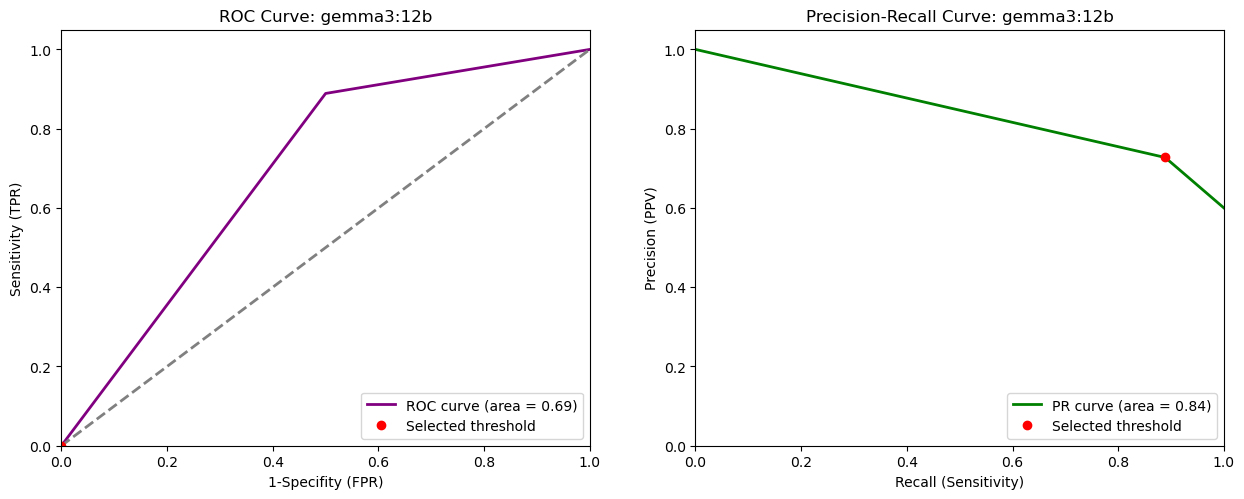

F1: 0.80,  Prev: 0.60,  Sens: 0.89,  Spec: 0.50,  PPV: 0.73,  NPV: 0.75,  ROC-AUC: 0.69, PR-AUC: 0.84
NaN Fctn: 0.00


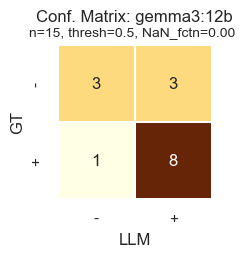

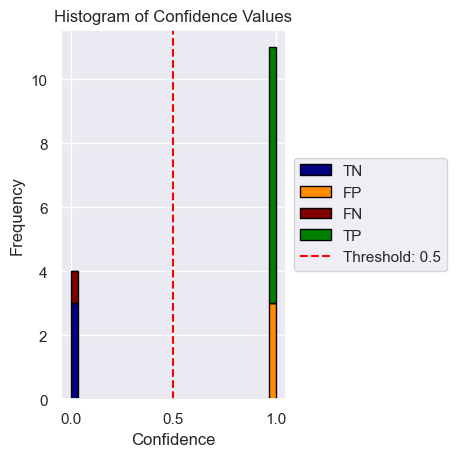

In [10]:
fig_title, f1, nan_fctn, roc_auc, pr_auc, prevalence, sensitivity, specificity, ppv, npv, total_samples, it_num, thresh = (
    analyze_it(df, reports_gt, total_iterations, "Test processing", llm_model_nm , 0.5))